In [1]:
import random
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
def uniform_sample_2d(c: tuple, r: float, n: int, label: str):
    data = []
    
    for i in range(n):
        angle = random.uniform(0, 2*math.pi)
        dist = random.uniform(0, r)

        data.append([c[0]+dist*math.cos(angle), c[1]+dist*math.sin(angle)])
    
    return {
        'features': np.array(data),
        'class_name': label
    }

In [3]:
class Perceptron:
    def __init__(self, nIn: int, nOut: int) -> None:
        self.nIn = nIn
        self.nOut = nOut
        self.w: np.ndarray = np.random.uniform(-1, 1, (nIn, nOut))
        self.b: np.ndarray = np.zeros((nOut))


    def predict(self, x:np.ndarray) -> np.ndarray:
        return np.dot(x, self.w)+self.b


    def train(self, xTrain: np.ndarray, yTrain: np.ndarray, lr, batch_size, max_iter) -> None:
        n = xTrain.shape[0]

        dw = np.zeros(self.w.shape)
        db = np.zeros(self.b.shape)

        for k in range(max_iter):
            idxs = np.random.choice(a=np.arange(n), size=batch_size, replace=False)

            for i in idxs:
                dwi, dbi = self.grads(xTrain[i], yTrain[i])
                dw += dwi
                db += dbi
            
            self.w -= lr*dw
            self.b -= lr*db

            dw *= 0
            db *= 0
            

    def grads(self, x: np.ndarray, y: np.ndarray) -> tuple[np.ndarray]:
        u = np.dot(x, self.w)+self.b

        dEdu = 2*(u-y)
        dEdw = dEdu*np.atleast_2d(x).T
        dEdb = dEdu
        
        return dEdw, dEdb
        
    
    def loss(self, x: np.ndarray, y: np.ndarray) -> float:
        n = y.shape[0]
        
        d = np.array([1/self.nOut*np.sum(np.square(self.predict(xi)-yi)) for xi, yi in zip(x, y)])
        
        return 1/n*np.sum(d)

In [4]:
sample11 = uniform_sample_2d((-1, 1), 1, 150, 'A')
sample12 = uniform_sample_2d((1, -1), 1, 150, 'A')
sample21 = uniform_sample_2d((1, 1), 1, 150, 'B')
sample22 = uniform_sample_2d((-1, -1), 1, 150, 'B')

data = [sample11, sample12, sample21, sample22]

In [5]:
df = pd.DataFrame(columns=['x1', 'x2', 'class_name'])

for sample in data:
    for feature in sample['features']:
        df.loc[len(df.index)] = [*feature, sample['class_name']]

df['synth1'] = df['x1']*df['x2']

class_mapping = {
    'A': -1,
    'B': 1
}

df[f'label'] = df['class_name'].map(lambda x: class_mapping[x])

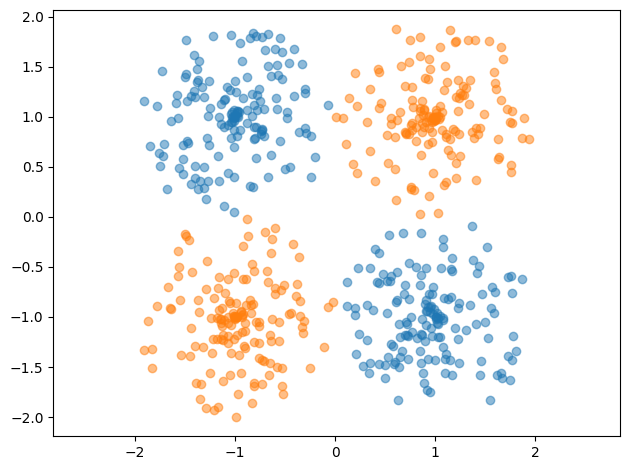

In [6]:
for name in df['class_name'].unique():
    plt.scatter(df[df['class_name'] == name]['x1'], df[df['class_name'] == name]['x2'], alpha=0.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
test_size = 0.8

p = np.random.permutation(df.index.size)

idx_train = p[int(p.size*test_size):]
idx_test = p[:int(p.size*test_size)]

features_columns = ['x1', 'x2', 'synth1']
labels_columns = ['label']

xTrain = np.array(df.iloc[idx_train][features_columns])
yTrain = np.array(df.iloc[idx_train][labels_columns])

xTest = np.array(df.iloc[idx_test][features_columns])
yTest = np.array(df.iloc[idx_test][labels_columns])

In [15]:
nIn = 3
nOut = 1

lr = 1e-2
batch_size = 8
max_iter = 100

model = Perceptron(nIn, nOut)

print('untrained loss: ', model.loss(xTest, yTest))

model.train(xTrain, yTrain, lr, batch_size, max_iter)

print('trained loss: ', model.loss(xTest, yTest))

untrained loss:  2.6981600281572535
trained loss:  0.24899196678480304
